...

The data is provided as a zip-compressed text file with **26 columns of numbers**, seperated by spaces. Each row is a snapshot of data taken during a single operational cycle, each column is a different variable, the columns correspond to:

1) unit number
2) time, in cycles
3) operational setting 1
4) operational setting 2
5) operational setting 3
6) sensor measurement 1
7) sensor measurement 2

…

26) sensor measurement 21

### Data Set Organization

Data Set: FD001
- Train trjectories: 100
- Test trajectories: 100
- Conditions: ONE (Sea Level)
- Fault Modes: ONE (HPC Degradation)

Data Set: FD002
- Train trjectories: 260
- Test trajectories: 259
- Conditions: SIX
- Fault Modes: ONE (HPC Degradation)

Data Set: FD003
- Train trjectories: 100
- Test trajectories: 100
- Conditions: ONE (Sea Level)
- Fault Modes: TWO (HPC Degradation, Fan Degradation)

Data Set: FD004
- Train trjectories: 248
- Test trajectories: 249
- Conditions: SIX
- Fault Modes: TWO (HPC Degradation, Fan Degradation)

### Reference
Reference: A. Saxena, K. Goebel, D. Simon, and N. Eklund, Damage Propagation Modeling for Aircraft Engine Run-to-Failure Simulation, in the Proceedings of the 1st International Conference on Prognostics and Health Management (PHM08), Denver CO, Oct 2008.

## Importing Libraries

In [564]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploring Data

In [565]:
# Give names to the features
index_names = ['engine_id', 'cycle']
setting_names = ['setting_1', 'setting_2', 'setting_3']

sensor_names=[
    "Fan inlet temperature (◦R)",
    "LPC outlet temperature (◦R)",
    "HPC outlet temperature (◦R)",
    "LPT outlet temperature (◦R)",
    "Fan inlet Pressure (psia)",
    "Bypass-duct Pressure (psia)",
    "HPC outlet pressure (psia)",
    "Physical fan speed (rpm)",
    "Physical core speed (rpm)",
    "Engine pressure ratio (P50/P2)",
    "HPC outlet Static pressure (psia)",
    "Ratio of fuel flow to PS30 (pps/psia)",
    "Corrected fan speed (rpm)",
    "Corrected core speed (rpm)",
    "Bypass Ratio",
    "Burner fuel-air ratio",
    "Bleed Enthalpy",
    "Required fan speed",
    "Required fan conversion speed",
    "High-pressure turbines cool airflow",
    "Low-pressure turbines cool airflow"
]

col_names = index_names + setting_names + sensor_names


df_train = pd.read_csv(('./CMaps/train_FD001.txt'), sep=r'\s+', header=None, names=col_names)
df_test = pd.read_csv(('./CMaps/test_FD001.txt'), sep=r'\s+', header=None, names=col_names)
df_test_RUL = pd.read_csv(('./CMaps/RUL_FD001.txt'), sep=r'\s+', header=None, names=['RUL'])

In [566]:
# Displaying the first few rows of the training data
df_train.head()

,engine_id,cycle,setting_1,setting_2,setting_3,Fan inlet temperature (◦R),LPC outlet temperature (◦R),HPC outlet temperature (◦R),LPT outlet temperature (◦R),Fan inlet Pressure (psia),...,Ratio of fuel flow to PS30 (pps/psia),Corrected fan speed (rpm),Corrected core speed (rpm),Bypass Ratio,Burner fuel-air ratio,Bleed Enthalpy,Required fan speed,Required fan conversion speed,High-pressure turbines cool airflow,Low-pressure turbines cool airflow
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [567]:
print('Shape of the train dataset : ',df_train.shape)
print('Shape of the test dataset : ',df_test.shape)
print('Percentage of the test dataset : ',len(df_test)/(len(df_test)+len(df_train)))

Shape of the train dataset :  (20631, 26)
Shape of the test dataset :  (13096, 26)
Percentage of the test dataset :  0.3882942449669404


In [568]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   engine_id                              20631 non-null  int64  
 1   cycle                                  20631 non-null  int64  
 2   setting_1                              20631 non-null  float64
 3   setting_2                              20631 non-null  float64
 4   setting_3                              20631 non-null  float64
 5   Fan inlet temperature (◦R)             20631 non-null  float64
 6   LPC outlet temperature (◦R)            20631 non-null  float64
 7   HPC outlet temperature (◦R)            20631 non-null  float64
 8   LPT outlet temperature (◦R)            20631 non-null  float64
 9   Fan inlet Pressure (psia)              20631 non-null  float64
 10  Bypass-duct Pressure (psia)            20631 non-null  float64
 11  HP

In [569]:
# Displaying the first few rows of the testing data
df_test.head()

,engine_id,cycle,setting_1,setting_2,setting_3,Fan inlet temperature (◦R),LPC outlet temperature (◦R),HPC outlet temperature (◦R),LPT outlet temperature (◦R),Fan inlet Pressure (psia),...,Ratio of fuel flow to PS30 (pps/psia),Corrected fan speed (rpm),Corrected core speed (rpm),Bypass Ratio,Burner fuel-air ratio,Bleed Enthalpy,Required fan speed,Required fan conversion speed,High-pressure turbines cool airflow,Low-pressure turbines cool airflow
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [570]:
df_train.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
engine_id,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
cycle,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
setting_1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
setting_2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
setting_3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
Fan inlet temperature (◦R),20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
LPC outlet temperature (◦R),20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
HPC outlet temperature (◦R),20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
LPT outlet temperature (◦R),20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
Fan inlet Pressure (psia),20631.0,14.620000,5.329200e-15,14.6200,14.6200,14.6200,14.6200,14.6200


## Feature Engineering & Data Visualization

We can drop sensors with a constant value, as they provide no value to our predictions.

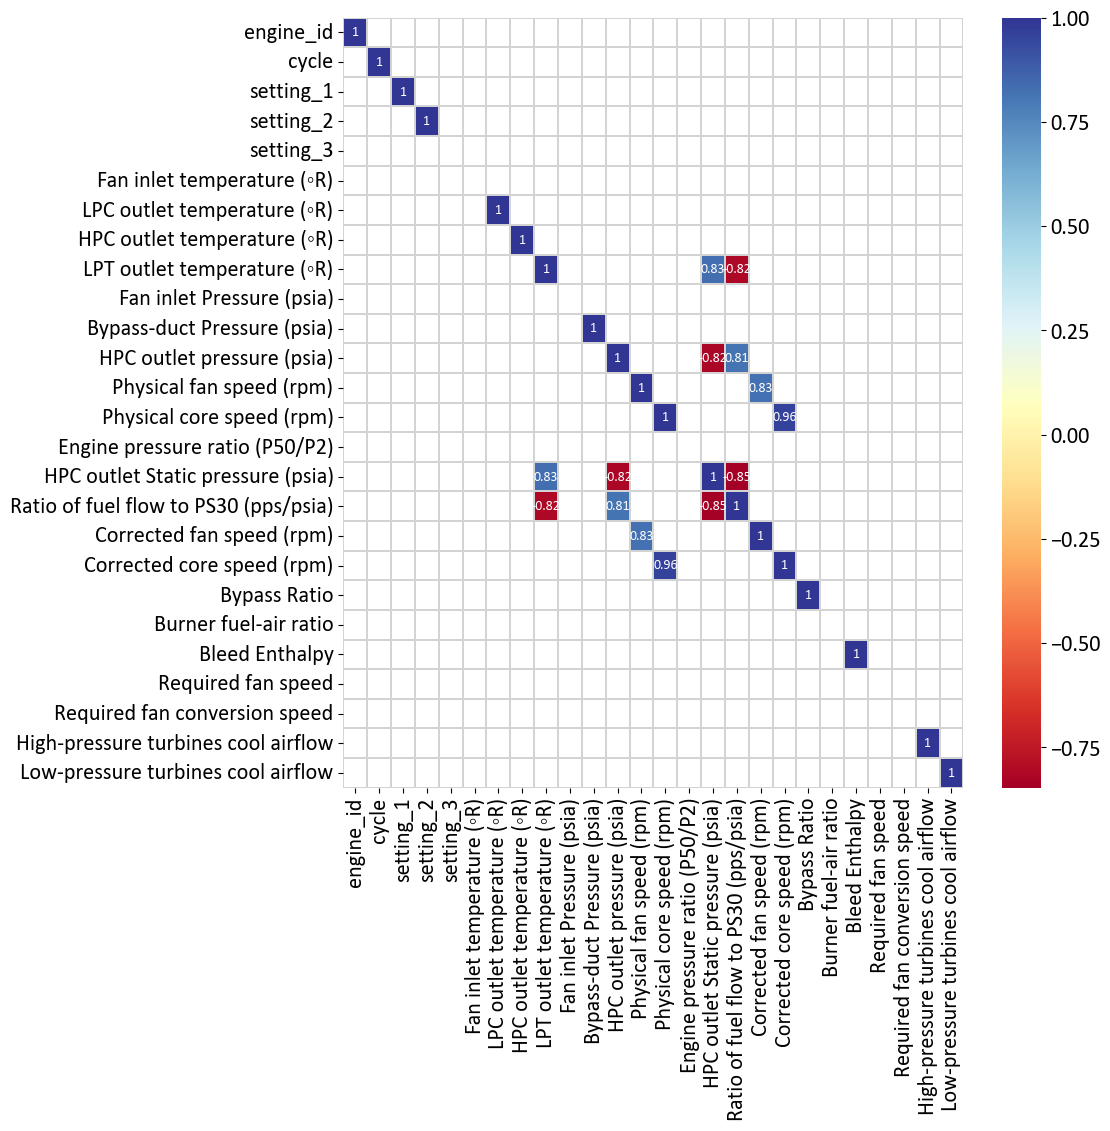

In [571]:
# Displaying the correlation matrix
plt.figure(figsize=(10,10))
threshold = 0.80
df_cluster = df_train.corr()
mask = df_cluster.where((abs(df_cluster) >= threshold)).isna()
sns.heatmap(df_cluster,
            cmap='RdYlBu',
            annot=True,
            mask=mask,
            linewidths=0.2, 
            linecolor='lightgrey'
).set_facecolor('white')

In [572]:
sensor_const_values = []
for feature in list(setting_names + sensor_names):
    try:
        if df_train[feature].min()==df_train[feature].max():
            sensor_const_values.append(feature)
    except:
        pass

print(sensor_const_values)
df_train.drop(sensor_const_values, axis=1, inplace=True)
df_test.drop(sensor_const_values, axis=1, inplace=True)

['setting_3', 'Fan inlet temperature (◦R)', 'Fan inlet Pressure (psia)', 'Engine pressure ratio (P50/P2)', 'Burner fuel-air ratio', 'Required fan speed', 'Required fan conversion speed']


We can also drop one of the highly correlated features and keep the other.

In [573]:
cor_matrix = df_cluster.abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
# The threshold for correlation is set at 0.95
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

df_train.drop(to_drop, axis=1, inplace=True)
df_test.drop(to_drop, axis=1, inplace=True)

['Corrected core speed (rpm)']


In [574]:
# The remaining features after dropping constant and highly correlated features
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   engine_id                              20631 non-null  int64  
 1   cycle                                  20631 non-null  int64  
 2   setting_1                              20631 non-null  float64
 3   setting_2                              20631 non-null  float64
 4   LPC outlet temperature (◦R)            20631 non-null  float64
 5   HPC outlet temperature (◦R)            20631 non-null  float64
 6   LPT outlet temperature (◦R)            20631 non-null  float64
 7   Bypass-duct Pressure (psia)            20631 non-null  float64
 8   HPC outlet pressure (psia)             20631 non-null  float64
 9   Physical fan speed (rpm)               20631 non-null  float64
 10  Physical core speed (rpm)              20631 non-null  float64
 11  HP

In [575]:
df_train.head()

,engine_id,cycle,setting_1,setting_2,LPC outlet temperature (◦R),HPC outlet temperature (◦R),LPT outlet temperature (◦R),Bypass-duct Pressure (psia),HPC outlet pressure (psia),Physical fan speed (rpm),Physical core speed (rpm),HPC outlet Static pressure (psia),Ratio of fuel flow to PS30 (pps/psia),Corrected fan speed (rpm),Bypass Ratio,Bleed Enthalpy,High-pressure turbines cool airflow,Low-pressure turbines cool airflow
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8.4195,392,39.06,23.4190
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392,39.00,23.4236
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390,38.95,23.3442
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392,38.88,23.3739
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393,38.90,23.4044


In [576]:
# Checking for missing values
features = list(df_train.columns)

print(f"{'Feature':35} {'Missing Values'}")
for feature in features:
    print(f"{feature:35} {df_train[feature].isna().sum()}")

Feature                             Missing Values
engine_id                           0
cycle                               0
setting_1                           0
setting_2                           0
LPC outlet temperature (◦R)         0
HPC outlet temperature (◦R)         0
LPT outlet temperature (◦R)         0
Bypass-duct Pressure (psia)         0
HPC outlet pressure (psia)          0
Physical fan speed (rpm)            0
Physical core speed (rpm)           0
HPC outlet Static pressure (psia)   0
Ratio of fuel flow to PS30 (pps/psia) 0
Corrected fan speed (rpm)           0
Bypass Ratio                        0
Bleed Enthalpy                      0
High-pressure turbines cool airflow 0
Low-pressure turbines cool airflow  0


Adding the target feature `RUL`.

`RUL` is calculated as the difference between the maximum life of the engine and the current cycle.

In [577]:
df_train_RUL = df_train.groupby(['engine_id']).agg({'cycle':'max'})
df_train_RUL.rename(columns={'cycle':'max_life'},inplace=True)

df_train=df_train.merge(df_train_RUL,how='left',on=['engine_id'])

df_train['RUL']=df_train['max_life']-df_train['cycle']

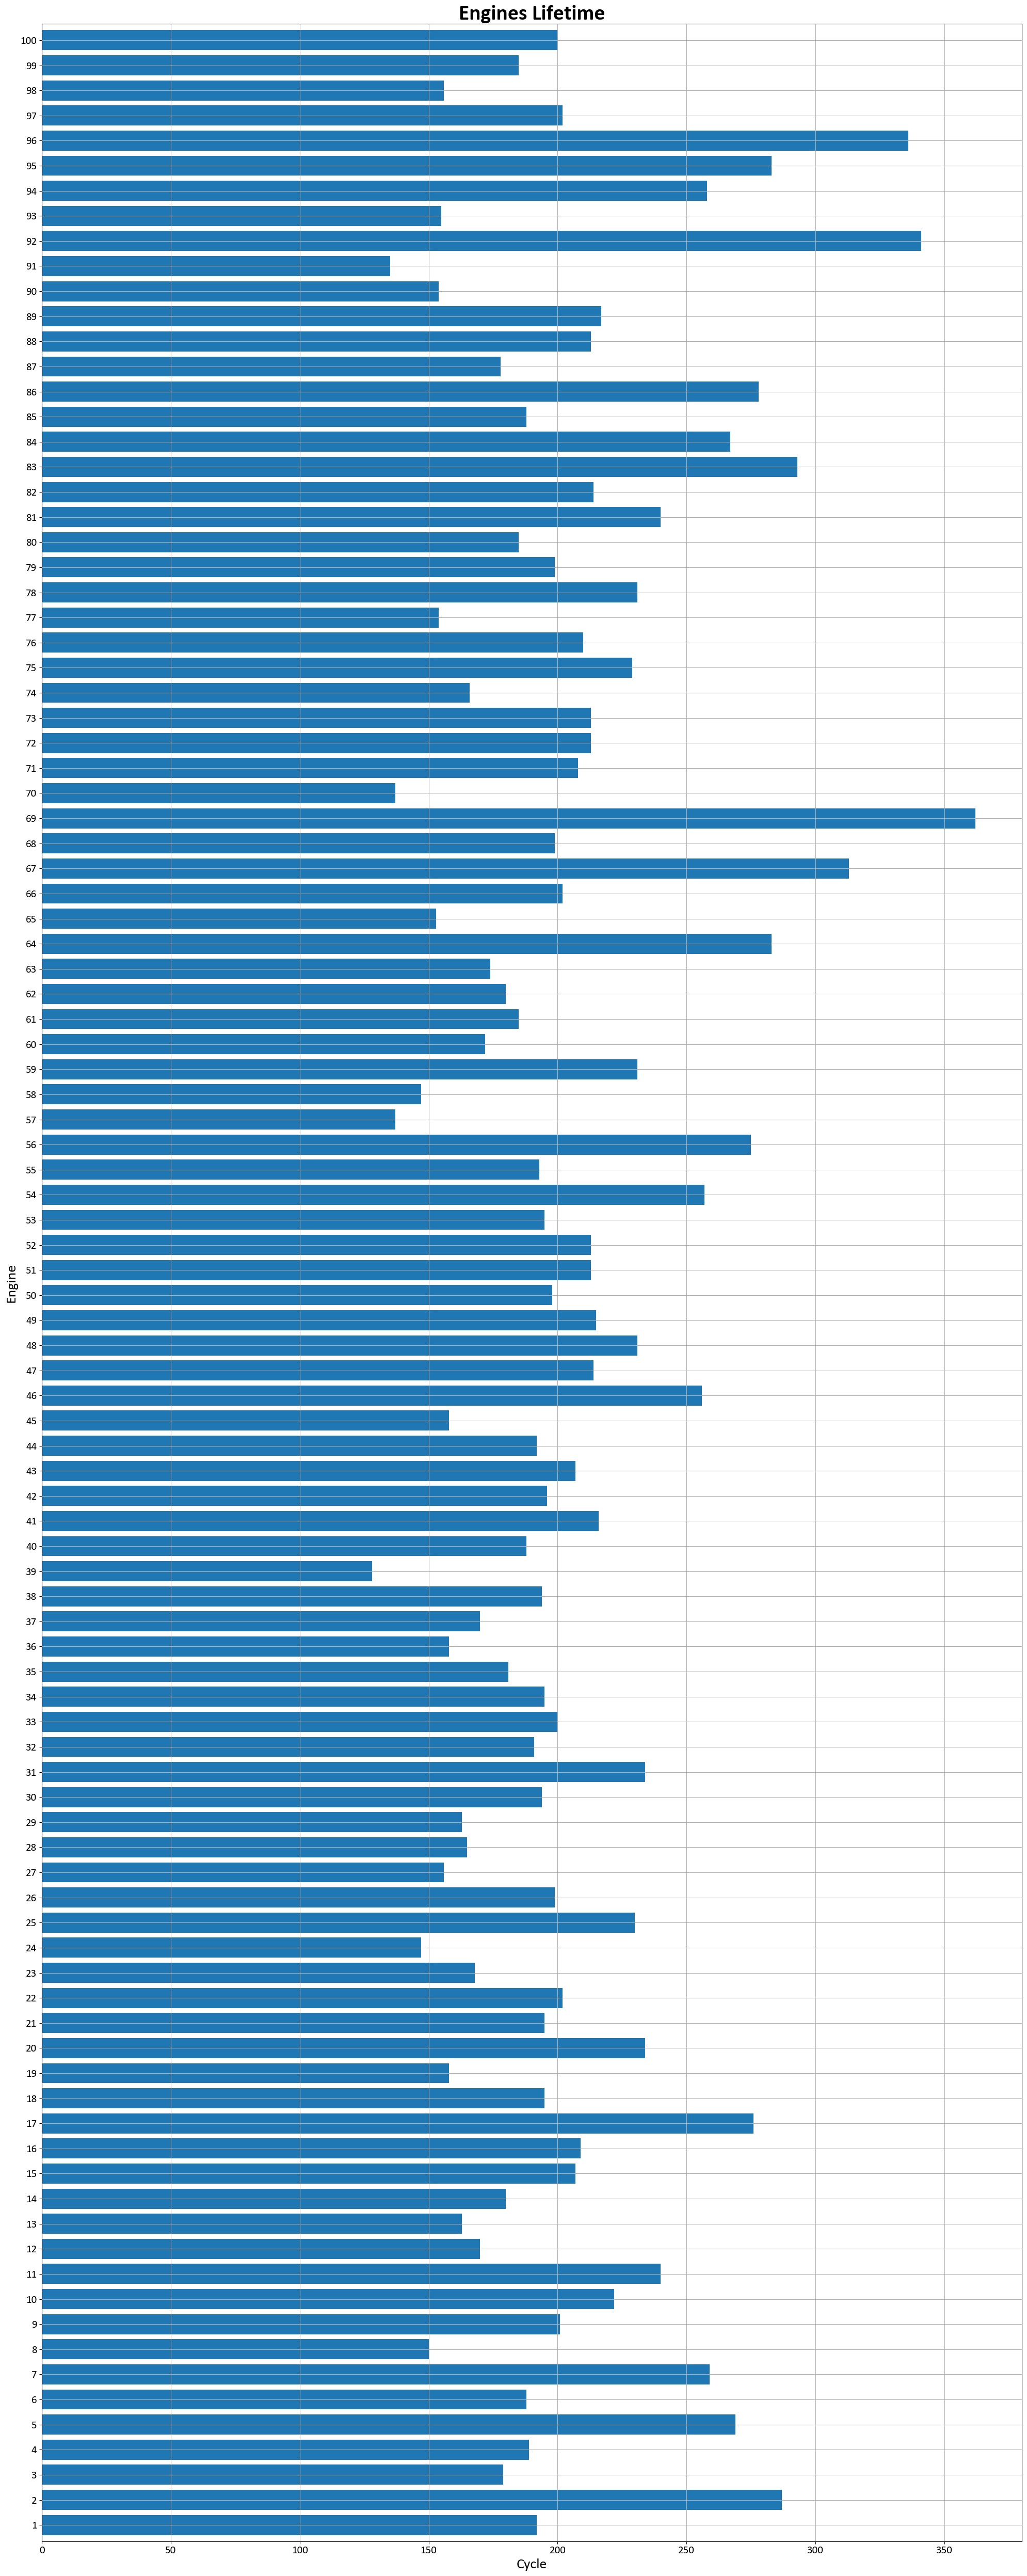

In [578]:
plt.figure(figsize=(20,50))
ax=df_train_RUL['max_life'].plot(kind='barh',width=0.8, stacked=True,align='center')
plt.title('Engines Lifetime',fontweight='bold',size=30)
plt.xlabel('Cycle', size=20)
plt.xticks(size=15)
plt.ylabel('Engine', size=20)
plt.yticks(size=15)
plt.grid(True)
plt.tight_layout()
plt.show()

Text(0.5, 9.444444444444466, 'Engine Lifetimes (Cycles)')

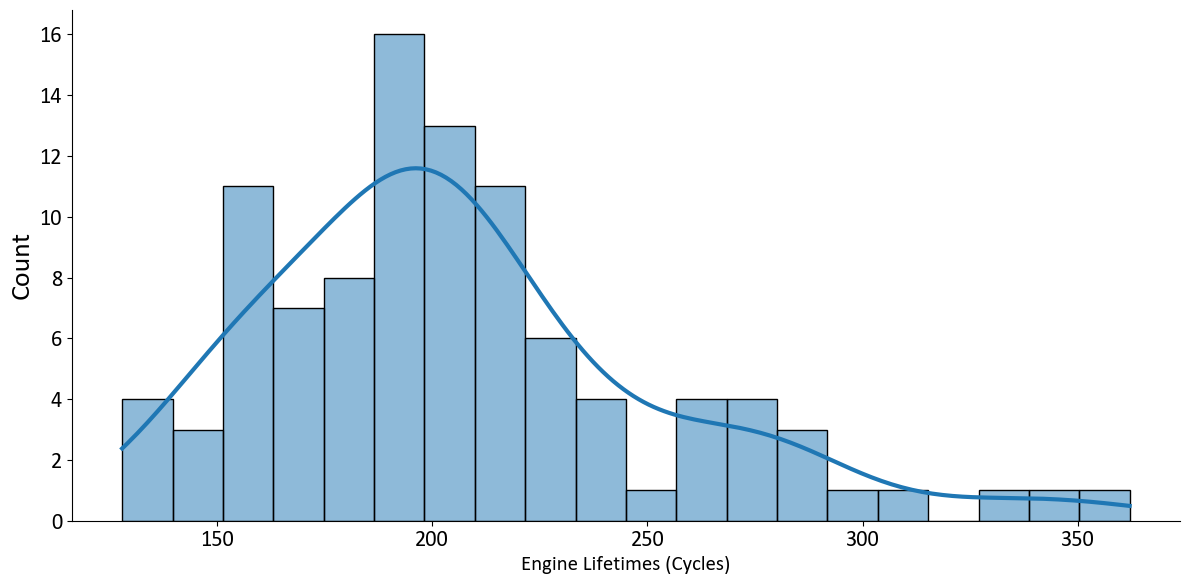

In [579]:
#Distribution of maximum time cycles
sns.displot(df_train_RUL['max_life'],kde=True, bins=20, height=6,aspect=2)
plt.xlabel('Engine Lifetimes (Cycles)',size=15)

In [580]:
df_train.drop(['max_life'],axis=1,inplace=True)
df_train.head()

,engine_id,cycle,setting_1,setting_2,LPC outlet temperature (◦R),HPC outlet temperature (◦R),LPT outlet temperature (◦R),Bypass-duct Pressure (psia),HPC outlet pressure (psia),Physical fan speed (rpm),Physical core speed (rpm),HPC outlet Static pressure (psia),Ratio of fuel flow to PS30 (pps/psia),Corrected fan speed (rpm),Bypass Ratio,Bleed Enthalpy,High-pressure turbines cool airflow,Low-pressure turbines cool airflow,RUL
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187


<Figure size 1000x1000 with 0 Axes>

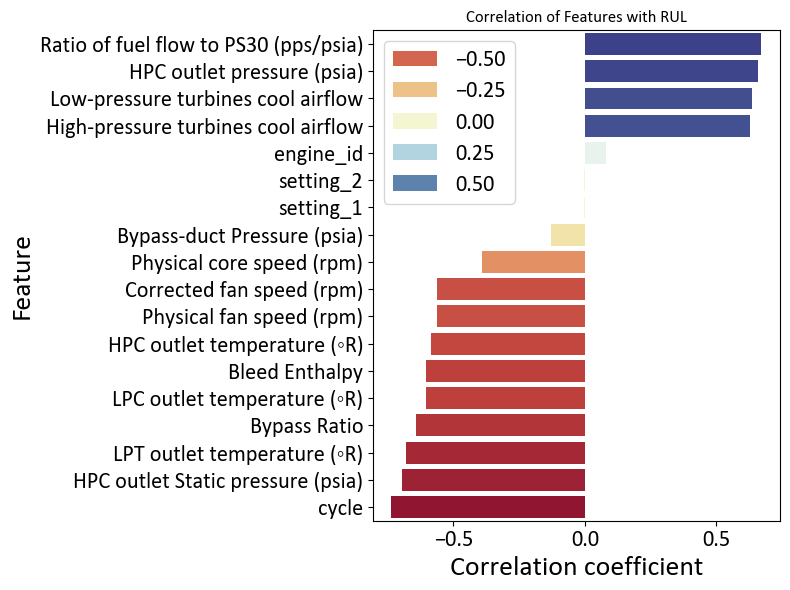

In [581]:
# Displaying the correlation matrix
plt.figure(figsize=(10,10))
threshold = 0.70
df_corr = df_train.corr()
rul_corr = df_corr['RUL'].sort_values(ascending=False).drop('RUL')

plt.figure(figsize=(8, 6))
sns.barplot(x=rul_corr.values, y=rul_corr.index, palette='RdYlBu', hue=rul_corr.values, dodge=False)
plt.title('Correlation of Features with RUL')
plt.xlabel('Correlation coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

We can drop `setting_1` and `setting_2` as they provide no correlation with the target `RUL`.

In [582]:
df_train.drop(['setting_1','setting_2'],axis=1,inplace=True)
df_test.drop(['setting_1','setting_2'],axis=1,inplace=True)

In [583]:
df_train.head()

,engine_id,cycle,LPC outlet temperature (◦R),HPC outlet temperature (◦R),LPT outlet temperature (◦R),Bypass-duct Pressure (psia),HPC outlet pressure (psia),Physical fan speed (rpm),Physical core speed (rpm),HPC outlet Static pressure (psia),Ratio of fuel flow to PS30 (pps/psia),Corrected fan speed (rpm),Bypass Ratio,Bleed Enthalpy,High-pressure turbines cool airflow,Low-pressure turbines cool airflow,RUL
0,1,1,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191
1,1,2,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190
2,1,3,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189
3,1,4,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188
4,1,5,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187


### Splitting the data

In [584]:
df_test_cycle = df_test.groupby(['engine_id']).agg({'cycle':'max'})
df_test_cycle.rename(columns={'cycle':'max_life'},inplace=True)

df_test_max=df_test.merge(df_test_cycle,how='left',on=['engine_id'])
df_test_max['RUL']=df_test_max['max_life']-df_test_max['cycle']

df_test_max = df_test_max[(df_test_max['cycle']==df_test_max['max_life'])]
df_test_max.drop(['max_life'], axis=1, inplace=True)
df_test_max.drop(['RUL'], axis=1, inplace=True)

In [585]:
feature_names = [col for col in df_train.columns if col not in ['RUL', 'engine_id']]

X_train = df_train[feature_names]
y_train = df_train.iloc[:,-1]
X_test = df_test_max[feature_names]
y_test = df_test_RUL.iloc[:,-1]

In [586]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Building

In [587]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

import time

In [588]:
models = {
    "kNN": KNeighborsRegressor(n_neighbors=9),
    "SVR": SVR(),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

results = []

In [589]:
for name, model in models.items():
    start = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start

    start_pred = time.time()
    y_pred = model.predict(X_test)
    pred_time = time.time() - start_pred

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(root_mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    results.append({
        "Model": name,
        "R2": r2,
        "RMSE": rmse,
        "MAE": mae,
        "Train Time (s)": train_time,
        "Predict Time (s)": pred_time
    })

    print(f"{name}: R2={r2:.3f}, RMSE={rmse:.2f}, MAE={mae:.2f}, Train Time={train_time:.2f}s, Predict Time={pred_time:.2f}s")

results_df = pd.DataFrame(results)
results_df

kNN: R2=0.603, RMSE=5.12, MAE=19.52, Train Time=0.03s, Predict Time=0.02s
SVR: R2=0.632, RMSE=5.02, MAE=18.71, Train Time=8.30s, Predict Time=0.09s
RandomForest: R2=0.593, RMSE=5.15, MAE=19.83, Train Time=17.80s, Predict Time=0.01s
GradientBoosting: R2=0.626, RMSE=5.04, MAE=18.22, Train Time=3.87s, Predict Time=0.00s


,Model,R2,RMSE,MAE,Train Time (s),Predict Time (s)
0,kNN,0.602514,5.118530,19.524444,0.030653,0.016815
1,SVR,0.631704,5.021855,18.711884,8.302116,0.091203
2,RandomForest,0.593022,5.148818,19.834500,17.797701,0.008209
3,GradientBoosting,0.625807,5.041837,18.221631,3.865091,0.000435


## Evaluation

kNN: R2=0.603, RMSE=26.20, MAE=19.52


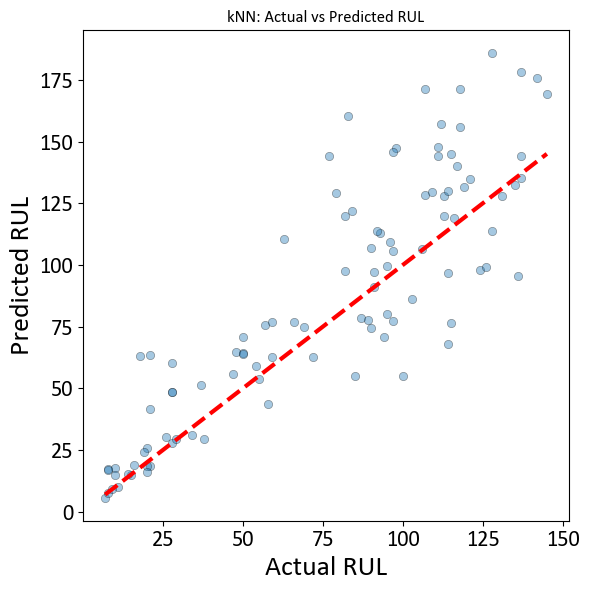

SVR: R2=0.632, RMSE=25.22, MAE=18.71


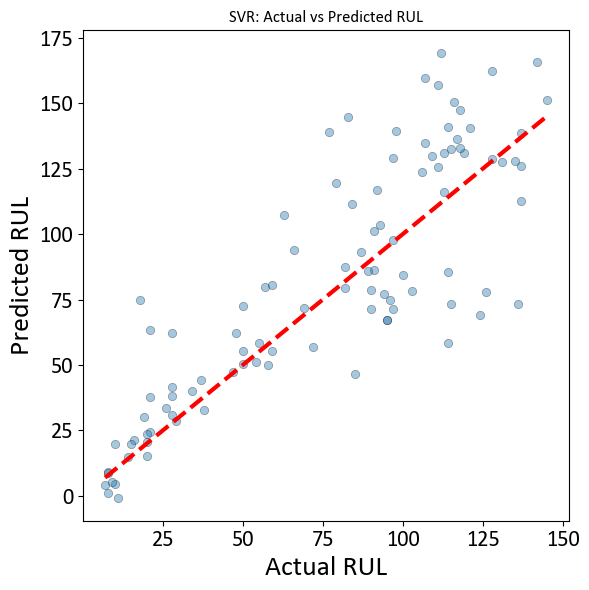

RandomForest: R2=0.593, RMSE=26.51, MAE=19.83


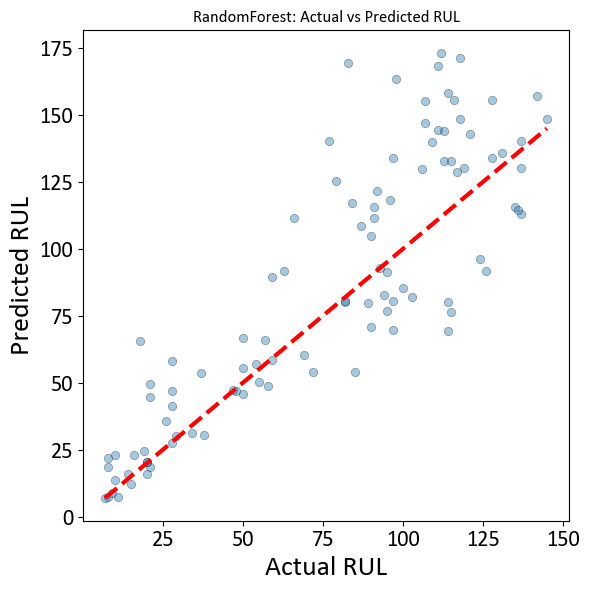

GradientBoosting: R2=0.626, RMSE=25.42, MAE=18.22


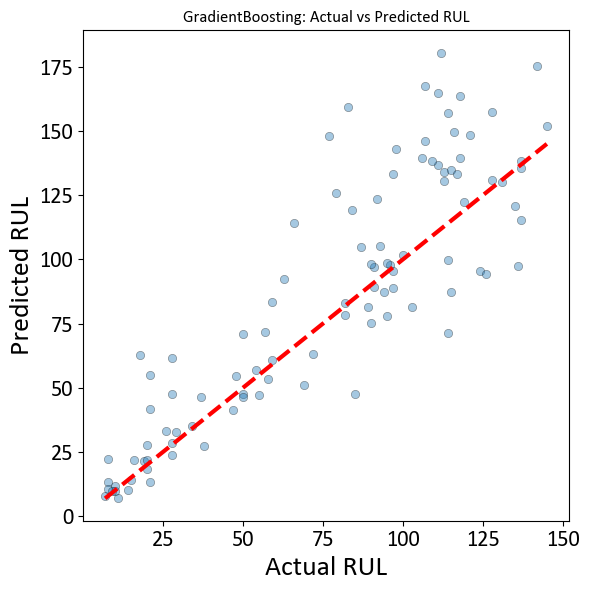

In [592]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

for name, model in models.items():
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{name}: R2={r2:.3f}, RMSE={rmse:.2f}, MAE={mae:.2f}")

    # Scatter plot
    plt.figure(figsize=(6,6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.4, edgecolor='k')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual RUL')
    plt.ylabel('Predicted RUL')
    plt.title(f'{name}: Actual vs Predicted RUL')
    plt.tight_layout()
    plt.show()

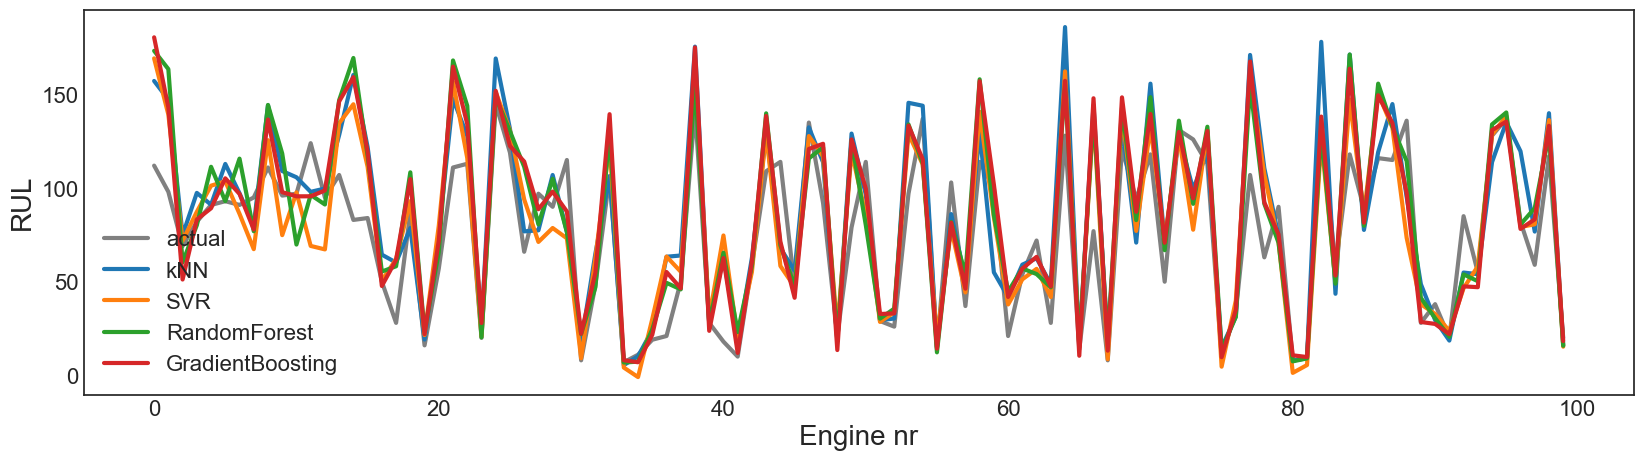

In [594]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('seaborn-v0_8-white')
plt.rcParams['figure.figsize'] = 20, 5

fig, ax = plt.subplots()
plt.ylabel('RUL')
plt.xlabel('Engine nr')

# Plot actual RUL
sns.lineplot(
    x=np.arange(len(y_test)),
    y=y_test.reset_index(drop=True) if hasattr(y_test, 'reset_index') else y_test,
    color='gray',
    label='actual',
    ax=ax
)

# Plot predictions for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    sns.lineplot(
        x=np.arange(len(y_pred)),
        y=y_pred,
        label=name,
        ax=ax
    )

ax.legend()
plt.show()

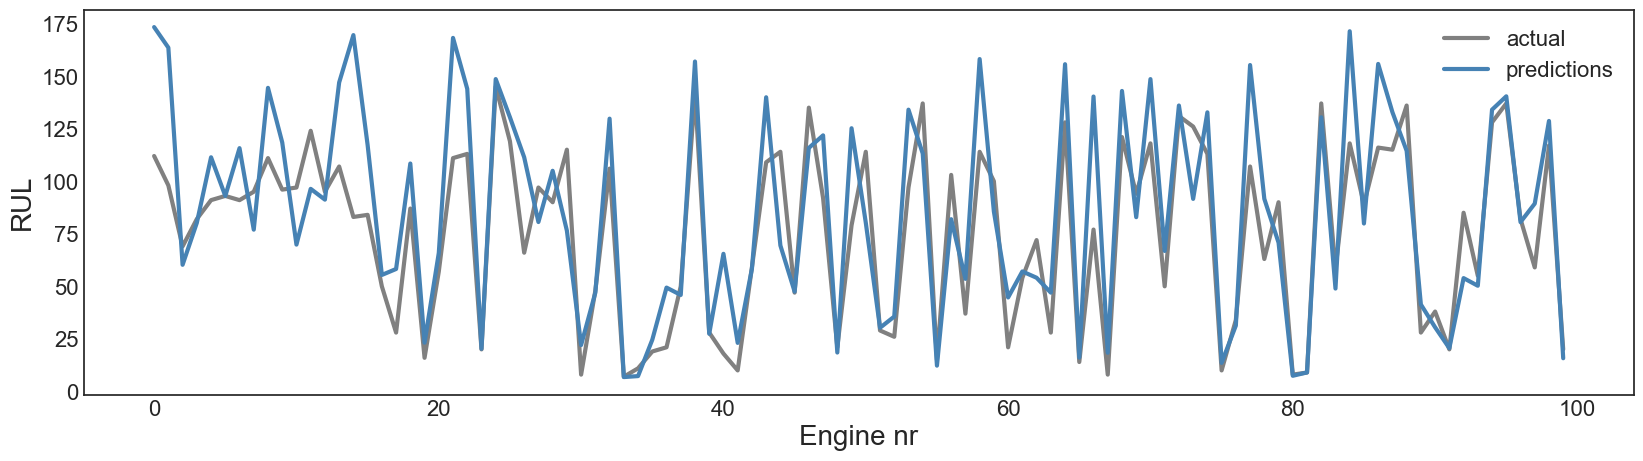

In [593]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('seaborn-v0_8-white')
plt.rcParams['figure.figsize'] = 20, 5

# Use your best model, e.g., RandomForest
best_model = models['RandomForest']
y_predictions = best_model.predict(X_test)

fig, ax = plt.subplots()
plt.ylabel('RUL')
plt.xlabel('Engine nr')

# If y_test is a pandas Series with engine_id as index, use reset_index(drop=True)
sns.lineplot(
    x=np.arange(len(y_test)),
    y=y_test.reset_index(drop=True) if hasattr(y_test, 'reset_index') else y_test,
    color='gray',
    label='actual',
    ax=ax
)
sns.lineplot(
    x=np.arange(len(y_predictions)),
    y=y_predictions,
    color='steelblue',
    label='predictions',
    ax=ax
)
ax.legend()
plt.show()

## Conclusion

In this project, we explored and modeled the Remaining Useful Life (RUL) prediction for turbofan engines using classical machine learning algorithms. After preprocessing and feature selection, we trained and evaluated kNN, SVR, Random Forest, and Gradient Boosting models. Among these, the Random Forest model achieved the best performance.

The results show that tree-based models can effectively capture the relationships in the data, though further improvements are possible. Limitations include the use of only one dataset and no hyperparameter tuning. In the future, we will explore deep learning models (such as LSTM) and tuning model parameters to further improve prediction accuracy.